In [1]:
import numpy as np
import pandas as pd
import time
import joblib
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import psutil
import memory_profiler




In [2]:
dataF=pd.read_csv('cicddos2019_dataset.csv')

dataI=pd.read_csv('iot23_combined.csv')

In [3]:
dataI=dataI.drop('Unnamed: 0',axis=1)
dataI[:2]

,ts,id.orig_h,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,1.540470e+09,192.168.1.132,0.003497,0,0,0.0,5.0,212.0,3.0,144.0,...,0,0,0,0,0,0,0,1,0,0
1,1.540470e+09,192.168.1.132,0.036724,34,311,0.0,1.0,62.0,1.0,339.0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
dataF=dataF.drop('Unnamed: 0',axis=1)
dataF[:2]

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,35.08846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


In [5]:
# Categorize data into 'Benign' and 'Attack'
dataI['label'] = dataI['label'].apply(lambda x: 'Benign' if x == 'Benign' else 'Attack')


In [6]:
from collections import Counter
Counter(dataI["label"])

Counter({'Attack': 1393140, 'Benign': 53481})

In [7]:
from collections import Counter
Counter(dataF["Class"])

Counter({'Attack': 333540, 'Benign': 97831})

In [8]:
dataI.rename(columns = {'label':'Target'}, inplace = True)
dataF.rename(columns = {'Class':'Target'}, inplace = True)

In [9]:
dataF

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Target
0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.00000,35.088460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,17,2,2,0,802.0,0.0,401.0,401.0,401.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,17,48,2,0,766.0,0.0,383.0,383.0,383.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.50000,22.516660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.50000,34.063667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,6,550740,2,1,0.0,31.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
431367,6,337766,1,3,31.0,62.0,31.0,31.0,31.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
431368,6,228,1,2,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign
431369,17,47709,2,2,86.0,194.0,43.0,43.0,43.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign


In [10]:
DataITarget=dataI[["Target"]]

dataIFeatures=dataI.drop(["Target"], axis=1)

DataFTarget=dataF[["Target","Label"]]

dataFFeatures=dataF.drop(["Target","Label"], axis=1)

In [11]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

dataIFeatures=dataIFeatures.apply(LabelEncoder().fit_transform)

In [12]:
dataFFeatures=dataFFeatures.apply(LabelEncoder().fit_transform)

In [13]:
dataIFeatures

,ts,id.orig_h,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,518258,1352,545,1,1,0,5,80,3,48,...,0,0,0,0,0,0,0,1,0,0
1,518257,1352,2579,13,170,0,1,9,1,108,...,0,0,0,0,0,0,0,1,0,0
2,518256,1352,43119,379,1,0,48,1049,0,0,...,0,0,0,1,0,0,0,0,0,0
3,518260,1352,5256,26,13,0,1,21,1,13,...,0,0,0,0,0,0,0,1,0,0
4,518261,1352,3897,26,13,0,1,21,1,13,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446616,399991,1366,1,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1446617,399992,1366,1,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1446618,399993,1366,1,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1446619,399994,1366,1,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [14]:
len(dataIFeatures)

1446621

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
dt = ExtraTreesClassifier(n_estimators=300, random_state=5, max_depth=10)

X =dataFFeatures

y =  DataFTarget["Target"]
# Training the model
dt.fit(X, y)

# Computing the importance of each feature
feature_importance = dt.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in dt.estimators_], axis = 0)
plt.figure(figsize=(13,7),dpi=400)
plt.xticks(rotation=90)
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels',fontsize=12)
plt.ylabel('Feature Importances',fontsize=12)


plt.tight_layout(pad=0)
plt.savefig('FeatureImp.pdf')
plt.show()

ETC


NameError: name 'plt' is not defined

In [ ]:
featuresimpF=[]
for i in range (len(X.columns)):
    if feature_importance_normalized[i]>0.02:
        featuresimpF.append(X.columns[i])
len(featuresimpF)        

43

ETC


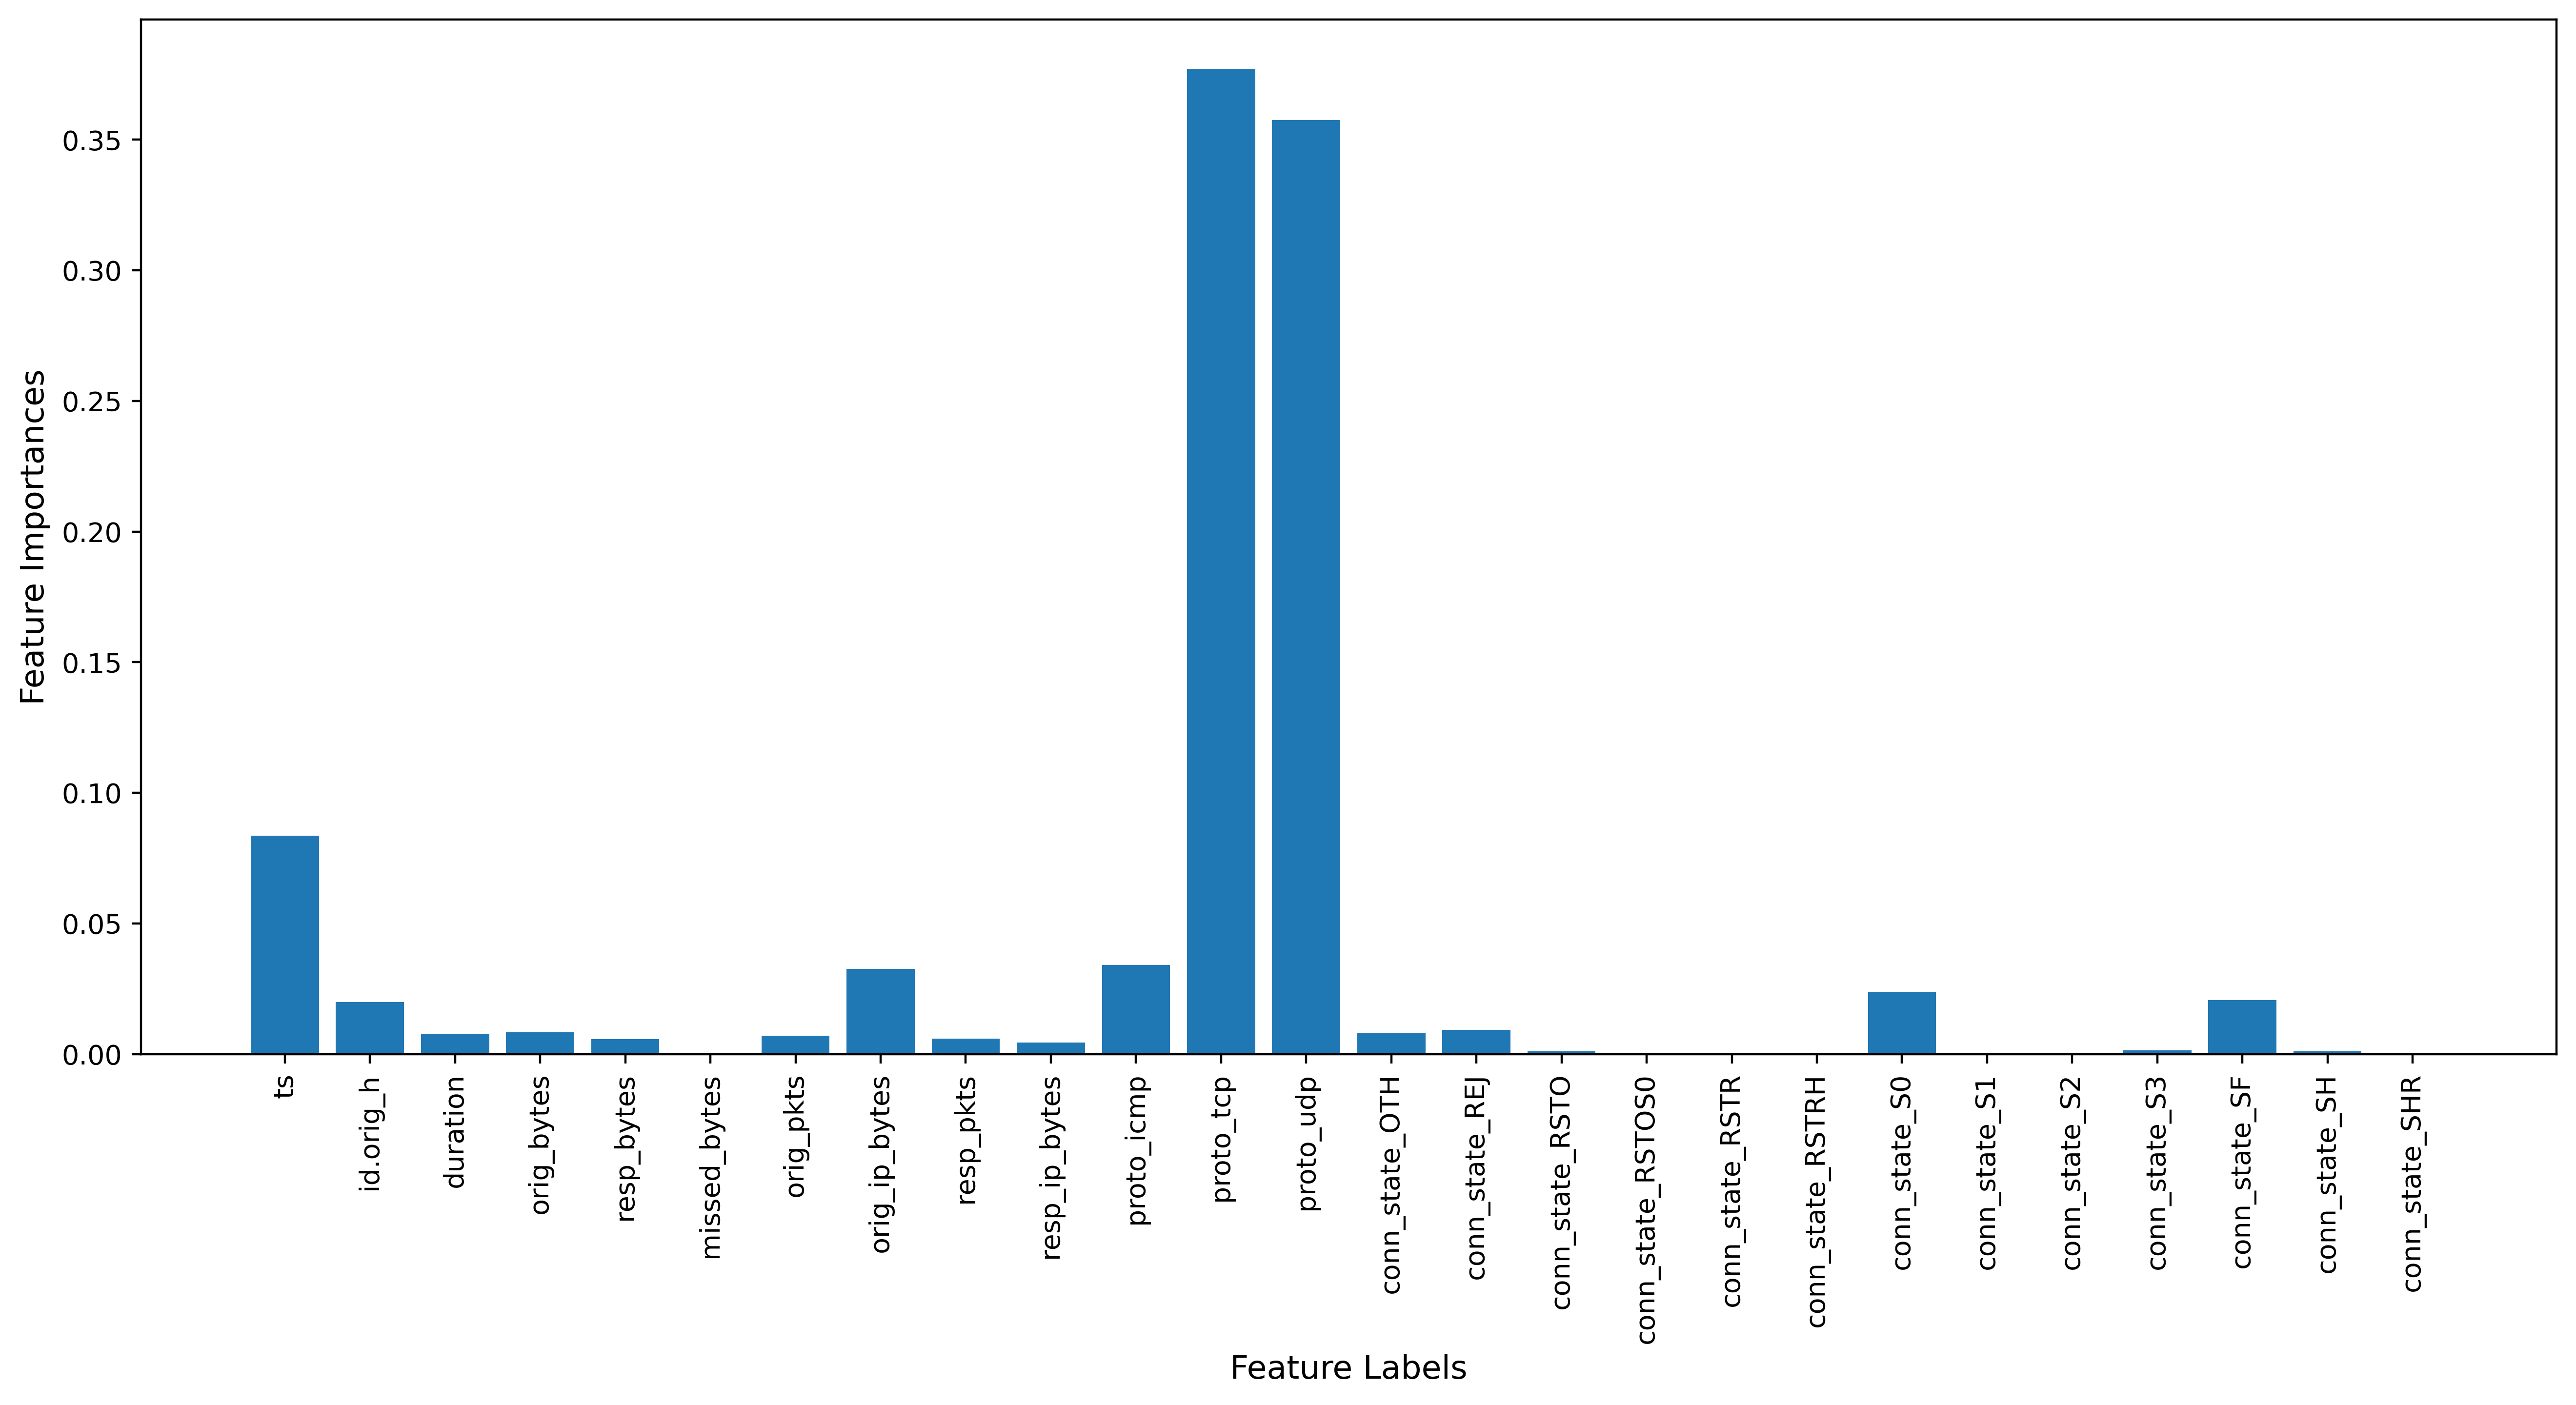

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
print("ETC")
dt = ExtraTreesClassifier(n_estimators=300, random_state=5, max_depth=10)

X =dataIFeatures

y =  DataITarget["Target"]
# Training the model
dt.fit(X, y)

# Computing the importance of each feature
feature_importance = dt.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in dt.estimators_], axis = 0)
plt.figure(figsize=(13,7),dpi=400)
plt.xticks(rotation=90)
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels',fontsize=12)
plt.ylabel('Feature Importances',fontsize=12)


plt.tight_layout(pad=0)
plt.savefig('FeatureImp.pdf')
plt.show()

In [ ]:
featuresimp=[]
for i in range (len(X.columns)):
    if feature_importance_normalized[i]>0.001:
        featuresimp.append(X.columns[i])
len(featuresimp)       

19

In [ ]:
dataIFeatures= dataIFeatures[featuresimp]

In [ ]:
dataFFeatures= dataFFeatures[featuresimpF]

In [ ]:
dataIFeatures.shape[1]

19

In [ ]:
dataFFeatures.shape[1]

43

In [ ]:
Counter(DataITarget['Target'][:50000])

Counter({'Attack': 26785, 'Benign': 23215})

In [ ]:
Counter(DataFTarget['Target'][:50000])

Counter({'Attack': 42747, 'Benign': 7253})

In [16]:
from sklearn.cross_decomposition import CCA
from sklearn.datasets import make_multilabel_classification
from sklearn.decomposition import PCA

# Simulate two datasets (these would be your network datasets with different features)
X1= dataIFeatures[:50000]
X2 = dataFFeatures[:50000]

# First, reduce the dimensionality of both datasets to make them more manageable
#pca1 = PCA(n_components=20)
#pca2 = PCA(n_components=20)

#X1_pca = pca1.fit_transform(X1)
#X2_pca = pca2.fit_transform(X2)

# Now, perform CCA to align the two datasets in a shared space
cca = CCA(n_components=15)
X1_c, X2_c = cca.fit_transform(X1, X2)

# X1_c and X2_c are now aligned in the same manifold space
newDI=pd.DataFrame(X1_c)
newDF=pd.DataFrame(X2_c)

MENFCCA = pd.concat([newDI, newDF], ignore_index=True)
MENTCCA = pd.concat([DataITarget['Target'][:50000], DataFTarget['Target'][:50000]], ignore_index=True)

In [17]:

from sklearn.cross_decomposition import PLSCanonical
from sklearn.datasets import make_multilabel_classification
from sklearn.decomposition import PCA

# Simulate two datasets (these would be your network datasets with different features)
X1= dataIFeatures[:50000]
X2 = dataFFeatures[:50000]



# Now, perform CCA to align the two datasets in a shared space
cca = PLSCanonical(n_components=15)
X1_c, X2_c = cca.fit_transform(X1, X2)
r1,r2=cca.inverse_transform(X1_c, X2_c)
# X1_c and X2_c are now aligned in the same manifold space
newDI=pd.DataFrame(X1_c)
newDF=pd.DataFrame(X2_c)

MENFPSL = pd.concat([newDI, newDF], ignore_index=True)
MENTPSL = pd.concat([DataITarget['Target'][:50000], DataFTarget['Target'][:50000]], ignore_index=True)


In [18]:
from collections import Counter


In [149]:
import numpy as np
import pandas as pd
from sklearn.cross_decomposition import PLSCanonical
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Simulate two datasets as pandas DataFrames (replace these with your actual DataFrames)
X1 = dataIFeatures[:50000]  # Replace with your actual data
X2 = dataFFeatures[:50000]  # Replace with your actual data

# Standardize the data
scaler_X1 = StandardScaler()
scaler_X2 = StandardScaler()
X1_scaled = scaler_X1.fit_transform(X1)
X2_scaled = scaler_X2.fit_transform(X2)

# Perform Partial Least Squares Canonical (PLSCanonical)
n_components = min(X1_scaled.shape[1], X2_scaled.shape[1])
pls = PLSCanonical(n_components=15)
X1_c, X2_c = pls.fit_transform(X1_scaled, X2_scaled)

# Create DataFrames for transformed data
newDI = pd.DataFrame(X1_c)
newDF = pd.DataFrame(X2_c)
print(newDI.shape)
print(newDF.shape)
# Concatenate transformed features
MENFCCA = pd.concat([newDI, newDF], axis=0)
print(MENFCCA.shape)
# Concatenate target values
MENTCCA = pd.concat([DataITarget['Target'][:50000], DataFTarget['Target'][:50000]], axis=0)
print(Counter(MENTCCA))
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(MENFCCA, MENTCCA, test_size=0.20, stratify=MENTCCA, shuffle=True)

# Train a RandomForestClassifier on transformed features
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Compute permutation importance on the test set
results = permutation_importance(model, X_test, y_test, scoring='accuracy')
importance = results.importances_mean

# Create a DataFrame to display importance
importance_df = pd.DataFrame({
    'Feature': MENFCCA.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)


(50000, 15)
(50000, 15)
(100000, 15)
Counter({'Attack': 69532, 'Benign': 30468})
    Feature  Importance
2         2     0.07218
3         3     0.02871
12       12     0.01654
4         4     0.01142
9         9     0.00845
10       10     0.00735
1         1     0.00509
11       11     0.00300
6         6     0.00198
14       14     0.00168
7         7     0.00116
8         8    -0.00003
0         0    -0.00168
13       13    -0.00197
5         5    -0.00277


In [151]:
import numpy as np
import pandas as pd
from sklearn.cross_decomposition import PLSCanonical
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Simulate two datasets as pandas DataFrames (replace these with your actual DataFrames)
X1 = dataIFeatures[:50000]  # Replace with your actual data
X2 = dataFFeatures[:50000]  # Replace with your actual data

# Standardize the data
scaler_X1 = StandardScaler()
scaler_X2 = StandardScaler()
X1_scaled = scaler_X1.fit_transform(X1)
X2_scaled = scaler_X2.fit_transform(X2)

# Perform Partial Least Squares Canonical (PLSCanonical)
#n_components = min(X1_scaled.shape[1], X2_scaled.shape[1])
pls = PLSCanonical(n_components=15)
X1_c, X2_c = pls.fit_transform(X1_scaled, X2_scaled)

# Create DataFrames for transformed data
newDI = pd.DataFrame(X1_c)
newDF = pd.DataFrame(X2_c)

# Concatenate transformed features
MENFCCA = pd.concat([newDI, newDF], axis=0)

# Concatenate target values
MENTCCA = pd.concat([DataITarget['Target'][:50000], DataFTarget['Target'][:50000]], axis=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(MENFCCA, MENTCCA, test_size=0.20, stratify=MENTCCA, shuffle=True)

# Train a RandomForestClassifier on transformed features
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Compute permutation importance on the test set
results = permutation_importance(model, X_test, y_test, scoring='accuracy')
importance_transformed = results.importances_mean

# Analyze the loadings from PLSCanonical
loadings_X1 = pls.x_weights_
loadings_X2 = pls.y_weights_

# Calculate the influence of original features on the transformed features
# For X1 features
original_importance_X1 = np.abs(np.dot(loadings_X1, importance_transformed))

# For X2 features
original_importance_X2 = np.abs(np.dot(loadings_X2, importance_transformed))

# Create DataFrames to display importance
importance_X1_df = pd.DataFrame({
    'Feature': X1.columns,
    'Importance': original_importance_X1
}).sort_values(by='Importance', ascending=False)

importance_X2_df = pd.DataFrame({
    'Feature': X2.columns,
    'Importance': original_importance_X2
}).sort_values(by='Importance', ascending=False)

print("Original Feature Importances for X1:")
print(importance_X1_df)

print("\nOriginal Feature Importances for X2:")
print(importance_X2_df)


Original Feature Importances for X1:
            Feature  Importance
2          duration    0.043697
10        proto_tcp    0.033945
11        proto_udp    0.027446
14  conn_state_RSTO    0.022553
1         id.orig_h    0.021964
12   conn_state_OTH    0.021054
9        proto_icmp    0.020590
3        orig_bytes    0.017724
13   conn_state_REJ    0.012773
17    conn_state_SF    0.012375
5         orig_pkts    0.010063
16    conn_state_S3    0.009872
6     orig_ip_bytes    0.008145
18    conn_state_SH    0.006489
15    conn_state_S0    0.006192
0                ts    0.004468
7         resp_pkts    0.003860
4        resp_bytes    0.003265
8     resp_ip_bytes    0.002059

Original Feature Importances for X2:
                     Feature  Importance
3   Bwd Packets Length Total    0.024943
37         Subflow Bwd Bytes    0.024943
2   Fwd Packets Length Total    0.024511
36         Subflow Fwd Bytes    0.024511
35      Avg Bwd Segment Size    0.023826
9     Bwd Packet Length Mean    0.02382

In [174]:
!pip install --upgrade joblib
import joblib
import time
import psutil
from sklearn.metrics import classification_report, confusion_matrix

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Measure memory usage before training
    mem_before = psutil.Process().memory_info().rss / 1024 ** 2
    
    # Start timer for training
    start_train = time.time()
    
    model.fit(X_train, y_train)
    
    # End timer for training
    end_train = time.time()
    
    # Measure memory usage after training
    mem_after = psutil.Process().memory_info().rss / 1024 ** 2
    
    # Start timer for prediction
    start_test = time.time()
    
    y_pred = model.predict(X_test)
    
    # End timer for prediction
    end_test = time.time()
    
    # Calculate metrics
    train_time = end_train - start_train
    test_time = end_test - start_test
    memory_usage = mem_after - mem_before
    
    # Use joblib.dump to estimate model size
    # This is an approximation as it includes any overhead from the serialization process
    with open('temp_model.joblib', 'wb') as f:
        joblib.dump(model, f)
    model_size = os.path.getsize('temp_model.joblib') / 1024 ** 2  # Size in MB
    os.remove('temp_model.joblib')  # Clean up temporary file
    
    # Generate results
    classification_rep = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    return classification_rep, confusion_mat, train_time, test_time, memory_usage, model_size

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [184]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(MENFCCA, MENTCCA, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=200,   max_depth=20),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.05,  max_depth=20),
    'AdaBoost': AdaBoostClassifier(n_estimators=200,   learning_rate=0.05),
    'Support Vector Classifier': SVC(    C=1,                       # Regularization parameter
    kernel='rbf',              # Kernel type
    gamma='scale',            # Kernel coefficient
                                         ),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(    n_neighbors=5,             # Number of neighbors to use
    weights='uniform')
}

for name, model in models.items():
    print(f"\nEvaluating {name}...")
    
    # 10-Fold Cross Validation
    cv_scores = cross_val_score(model, MENFCCA, MENTCCA, cv=10)
    print(f"10-Fold Cross Validation Mean Accuracy: {np.mean(cv_scores):.2f}")
    
    # Train and evaluate model
    class_rep, conf_mat, train_time, test_time, mem_usage, model_size = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)
    
    # Print results
    print(f"\nClassification Report for {name}:\n{class_rep}")
    print(f"Confusion Matrix for {name}:\n{conf_mat}")
    print(f"Training Time for {name}: {train_time:.4f} seconds")
    print(f"Testing Time for {name}: {test_time:.4f} seconds")
    print(f"Memory Usage for {name}: {mem_usage:.2f} MB")
    print(f"Model Size for {name}: {model_size:.2f} MB")



Evaluating Random Forest...
10-Fold Cross Validation Mean Accuracy: 0.69

Classification Report for Random Forest:
              precision    recall  f1-score   support

      Attack       0.97      1.00      0.98     13911
      Benign       1.00      0.93      0.96      6089

    accuracy                           0.98     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.98      0.98      0.98     20000

Confusion Matrix for Random Forest:
[[13897    14]
 [  442  5647]]
Training Time for Random Forest: 78.5913 seconds
Testing Time for Random Forest: 0.4938 seconds
Memory Usage for Random Forest: 10.73 MB
Model Size for Random Forest: 7.38 MB

Evaluating Gradient Boosting...
10-Fold Cross Validation Mean Accuracy: 0.69

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

      Attack       0.97      0.99      0.98     13911
      Benign       0.97      0.93      0.95      6089

    accuracy               

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from skmultiflow.drift_detection import ADWIN
from sklearn.model_selection import train_test_split

# Initialize the model and drift detector
model = SGDClassifier(max_iter=1, warm_start=True, random_state=0)
adwin = ADWIN()

# Simulate data loading (replace with actual data loading logic)
def load_data():
    # Replace with actual loading code
    MENFCCA = pd.concat([newDI, newDF], axis=0)
    MENTCCA = pd.concat([DataITarget['Target'][:50000], DataFTarget['Target'][:50000]], axis=0)
    return MENFCCA, MENTCCA

def get_next_batch(MENFCCA, MENTCCA, start_index, batch_size=10000):
    end_index = start_index + batch_size
    if end_index > len(MENFCCA):
        end_index = len(MENFCCA)
    X_batch = MENFCCA.iloc[start_index:end_index]
    y_batch = MENTCCA.iloc[start_index:end_index]
    return X_batch, y_batch

# Concept Drift Detection Function
def detect_concept_drift(X_batch, feature_column='some_feature_column'):
    for value in X_batch[feature_column]:
        adwin.add_element(value)
        if adwin.detected_change():
            print(f"Concept drift detected in feature: {feature_column}")
            return True
    return False

# Update Model Function
def update_model_if_needed(model, X_train, y_train, X_test, y_test):
    print("Updating model with new data...")
    model.partial_fit(X_train, y_train, classes=np.unique(y_train))
    
    # Evaluate the updated model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model accuracy after update: {accuracy:.2f}")

# Main Training and Updating Loop
def train_and_update_model(initial_batch_size=10000, batch_size=10000):
    MENFCCA, MENTCCA = load_data()

    # Initial training
    X_train, y_train = get_next_batch(MENFCCA, MENTCCA, 0, initial_batch_size)
    X_remaining, X_test, y_remaining, y_test = train_test_split(
        MENFCCA, MENTCCA, test_size=0.2, random_state=0
    )
    
    model.fit(X_train, y_train)

    start_index = initial_batch_size
    while start_index < len(MENFCCA):
        # Fetch next batch
        X_batch, y_batch = get_next_batch(MENFCCA, MENTCCA, start_index, batch_size)
        start_index += batch_size
        
        # Check for concept drift
        if detect_concept_drift(X_batch):
            print("Significant concept drift detected. Retraining model...")
            # Combine old and new data for retraining
            X_train, X_test, y_train, y_test = train_test_split(
                pd.concat([X_remaining, X_batch]), 
                pd.concat([y_remaining, y_batch]),
                test_size=0.2, 
                random_state=0
            )
            
            # Update the model with new data
            update_model_if_needed(model, X_train, y_train, X_test, y_test)
            
            # Update the remaining dataset
            X_remaining = pd.concat([X_remaining, X_batch])
            y_remaining = pd.concat([y_remaining, y_batch])
        else:
            print("No significant concept drift detected. Model remains unchanged.")
        
        # Optionally: Save the model or perform other tasks
        # Example: joblib.dump(model, 'updated_model.pkl')

# Start training and updating process
train_and_update_model()


In [29]:
X_train, X_test, y_train, y_test = train_test_split(MENFCCA, MENTCCA, test_size=0.20, stratify=MENTCCA, shuffle=True)

In [29]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
a =  RandomForestClassifier(n_estimators=300, random_state=2,max_depth=50) 
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.96955
              precision    recall  f1-score   support

      Attack       0.97      0.99      0.98     13906
      Benign       0.97      0.93      0.95      6094

    accuracy                           0.97     20000
   macro avg       0.97      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000

[[13714   192]
 [  417  5677]]
Wall time: 3min 5s


In [31]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, MENFCCA, MENTCCA, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.69 accuracy with a standard deviation of 0.33


In [32]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
a =  ExtraTreesClassifier(n_estimators=300, random_state=2,max_depth=50) 
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.9624
              precision    recall  f1-score   support

      Attack       0.97      0.97      0.97     13906
      Benign       0.94      0.93      0.94      6094

    accuracy                           0.96     20000
   macro avg       0.96      0.95      0.96     20000
weighted avg       0.96      0.96      0.96     20000

[[13556   350]
 [  402  5692]]
Wall time: 25.2 s


In [33]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, MENFCCA, MENTCCA, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.69 accuracy with a standard deviation of 0.33


In [34]:
%%time

from sklearn.linear_model import LogisticRegression
a=LogisticRegression(solver='liblinear',multi_class='ovr',C=2.0)
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.9392
              precision    recall  f1-score   support

      Attack       0.92      1.00      0.96     13906
      Benign       0.99      0.81      0.89      6094

    accuracy                           0.94     20000
   macro avg       0.96      0.90      0.92     20000
weighted avg       0.94      0.94      0.94     20000

[[13867    39]
 [ 1177  4917]]
Wall time: 1.63 s


In [35]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, MENFCCA, MENTCCA, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.89 accuracy with a standard deviation of 0.08


In [36]:
%%time

from sklearn.neighbors import KNeighborsClassifier
a = KNeighborsClassifier(n_neighbors=7)
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.977
              precision    recall  f1-score   support

      Attack       0.97      1.00      0.98     13906
      Benign       1.00      0.93      0.96      6094

    accuracy                           0.98     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.98      0.98      0.98     20000

[[13890    16]
 [  444  5650]]
Wall time: 3.13 s


In [37]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, MENFCCA, MENTCCA, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.71 accuracy with a standard deviation of 0.33


In [45]:
%%time

# Train LightGBM Classifier
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(random_state=2,n_estimators=300)
lg=lgbmc.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = lg.predict(X_test)
print(accuracy_score(y_test,y_pred_class))
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

0.9774
              precision    recall  f1-score   support

      Attack       0.97      1.00      0.98     13906
      Benign       1.00      0.93      0.96      6094

    accuracy                           0.98     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.98      0.98      0.98     20000

[[13888    18]
 [  434  5660]]
Wall time: 2.03 s


In [46]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(lgbmc, MENFCCA, MENTCCA, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.71 accuracy with a standard deviation of 0.33


In [43]:
%%time

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
lg=clf.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = lg.predict(X_test)
print(accuracy_score(y_test,y_pred_class))
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

0.72915
              precision    recall  f1-score   support

      Attack       0.72      0.99      0.84     13906
      Benign       0.82      0.14      0.24      6094

    accuracy                           0.73     20000
   macro avg       0.77      0.56      0.54     20000
weighted avg       0.75      0.73      0.65     20000

[[13721   185]
 [ 5232   862]]
Wall time: 1.07 s


In [44]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(clf, MENFCCA, MENTCCA, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.74 accuracy with a standard deviation of 0.08


In [33]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models


100%|███████████████████████████████████████████████████████████████████████████████| 29/29 [1:07:48<00:00, 140.30s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.98,0.97,None,0.98,1.01
LabelPropagation,0.98,0.97,None,0.98,1155.94
KNeighborsClassifier,0.98,0.96,None,0.98,4.84
SVC,0.98,0.96,None,0.98,251.01
AdaBoostClassifier,0.98,0.96,None,0.98,42.26
BaggingClassifier,0.97,0.96,None,0.97,64.96
RandomForestClassifier,0.97,0.96,None,0.97,55.29
ExtraTreesClassifier,0.96,0.96,None,0.96,17.06
ExtraTreeClassifier,0.96,0.95,None,0.96,1.14


In [47]:
X_train, X_test, y_train, y_test = train_test_split(MENFPSL, MENTPSL, test_size=0.20, stratify=MENTPSL, shuffle=True)

In [48]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
a =  RandomForestClassifier(n_estimators=300, random_state=2,max_depth=50) 
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))


0.9733
              precision    recall  f1-score   support

      Attack       0.97      0.99      0.98     13906
      Benign       0.98      0.93      0.96      6094

    accuracy                           0.97     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.97      0.97      0.97     20000

[[13793   113]
 [  421  5673]]
Wall time: 3min 1s


In [49]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, MENFPSL, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.69 accuracy with a standard deviation of 0.33


In [50]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
a =  ExtraTreesClassifier(n_estimators=300, random_state=2,max_depth=50) 
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.96415
              precision    recall  f1-score   support

      Attack       0.97      0.98      0.97     13906
      Benign       0.95      0.93      0.94      6094

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000

[[13593   313]
 [  404  5690]]
Wall time: 23.9 s


In [51]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, MENFPSL, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.68 accuracy with a standard deviation of 0.35


In [52]:
%%time
from sklearn.linear_model import LogisticRegression
a=LogisticRegression(solver='liblinear',multi_class='ovr',C=2.0)
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.95075
              precision    recall  f1-score   support

      Attack       0.94      0.99      0.97     13906
      Benign       0.98      0.85      0.91      6094

    accuracy                           0.95     20000
   macro avg       0.96      0.92      0.94     20000
weighted avg       0.95      0.95      0.95     20000

[[13811    95]
 [  890  5204]]
Wall time: 1.37 s


In [53]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, MENFPSL, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.94 accuracy with a standard deviation of 0.04


In [54]:
%%time
from sklearn.neighbors import KNeighborsClassifier
a = KNeighborsClassifier(n_neighbors=7)
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.97745
              precision    recall  f1-score   support

      Attack       0.97      1.00      0.98     13906
      Benign       1.00      0.93      0.96      6094

    accuracy                           0.98     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.98      0.98      0.98     20000

[[13891    15]
 [  436  5658]]
Wall time: 2.81 s


In [55]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, MENFPSL, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.70 accuracy with a standard deviation of 0.34


In [56]:
%%time

# Train LightGBM Classifier
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(random_state=2,n_estimators=300)
lg=lgbmc.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = lg.predict(X_test)
print(accuracy_score(y_test,y_pred_class))
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

0.978
              precision    recall  f1-score   support

      Attack       0.97      1.00      0.98     13906
      Benign       1.00      0.93      0.96      6094

    accuracy                           0.98     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.98      0.98      0.98     20000

[[13898     8]
 [  432  5662]]
Wall time: 2.45 s


In [57]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, MENFPSL, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.70 accuracy with a standard deviation of 0.34


In [60]:
%%time

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
lg=clf.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = lg.predict(X_test)
print(accuracy_score(y_test,y_pred_class))
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

0.7616
              precision    recall  f1-score   support

      Attack       0.77      0.94      0.85     13906
      Benign       0.73      0.34      0.47      6094

    accuracy                           0.76     20000
   macro avg       0.75      0.64      0.66     20000
weighted avg       0.76      0.76      0.73     20000

[[13136   770]
 [ 3998  2096]]
Wall time: 1.04 s


In [61]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(clf, MENFPSL, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.74 accuracy with a standard deviation of 0.14


In [41]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|███████████████████████████████████████████████████████████████████████████████| 29/29 [1:01:15<00:00, 126.76s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.98,0.97,None,0.98,0.99
LabelPropagation,0.98,0.97,None,0.98,1046.22
KNeighborsClassifier,0.98,0.97,None,0.98,2.17
SVC,0.98,0.97,None,0.98,180.52
AdaBoostClassifier,0.98,0.96,None,0.98,19.12
BaggingClassifier,0.97,0.96,None,0.97,27.96
RandomForestClassifier,0.97,0.96,None,0.97,57.13
ExtraTreesClassifier,0.97,0.96,None,0.97,6.87
DecisionTreeClassifier,0.96,0.96,None,0.96,3.69


In [33]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

MENTPSL=LabelEncoder().fit_transform(MENTPSL)

In [23]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

MENTCCA=LabelEncoder().fit_transform(MENTCCA)

In [24]:
import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# importing all necessary libraries to run the code
import re,string
import numpy as np
import pandas as pd
import keras_metrics
import tensorflow.keras
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Embedding
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

X1=np.array(MENFPSL)
# Reshape the data for 1D CNN
X1 = X1.reshape(X1.shape[0], X1.shape[1], 1)  # Assuming each row is a sequence

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, MENTPSL, test_size=0.2, random_state=42)

# Define the RNN-LSTM model
model = Sequential([
    SimpleRNN(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(units=1,activation='sigmoid')
])


# Compile the model with adjusted learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model with dropout for regularization
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

X1=np.array(MENFPSL)
# Reshape the data for 1D CNN
X1 = X1.reshape(X1.shape[0], X1.shape[1], 1)  # Assuming each row is a sequence

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, MENTPSL, test_size=0.2, random_state=42)

# Define the RNN-LSTM model
model = Sequential([
    SimpleRNN(units=256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=128),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(units=1,activation='sigmoid')
])


# Compile the model with adjusted learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model with dropout for regularization
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


In [35]:
# Generate predictions on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("\nClassification Report:")
#print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


for layer in model.layers[:-2]:
    layer.trainable = False
    
from keras.models import Model
# Define the feature extraction model
feature_extractor = Model(inputs=model.inputs, outputs=model.layers[-2].output)

extracted_features = feature_extractor.predict(X1)

625/625 [==============================] - 5s 7ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     13911
           1       0.99      0.90      0.94      6089

    accuracy                           0.97     20000
   macro avg       0.97      0.95      0.96     20000
weighted avg       0.97      0.97      0.96     20000

[[13852    59]
 [  632  5457]]
3125/3125 [==============================] - 28s 9ms/step


In [ ]:
%%time
# Generate predictions on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("\nClassification Report:")
#print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


for layer in model.layers[:-2]:
    layer.trainable = False
    
from keras.models import Model
# Define the feature extraction model
feature_extractor = Model(inputs=model.inputs, outputs=model.layers[-2].output)

extracted_features = feature_extractor.predict(X1)

X_train, X_test, y_train, y_test = train_test_split(extracted_features, MENTPSL, test_size=0.20, random_state=1, stratify=MENTPSL, shuffle=True)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=2, max_depth=150),
    "Logistic Regression": LogisticRegression(solver='liblinear', multi_class='ovr', C=2.0),
    #"KNN": KNeighborsClassifier(n_neighbors=5),
    "LightGBM": LGBMClassifier(random_state=2, n_estimators=300),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



=== Random Forest ===
Accuracy: 0.96665
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     13906
           1       0.95      0.94      0.94      6094

    accuracy                           0.97     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix:
 [[13632   274]
 [  393  5701]]

=== Logistic Regression ===
Accuracy: 0.97355
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     13906
           1       0.99      0.93      0.96      6094

    accuracy                           0.97     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.97      0.97      0.97     20000

Confusion Matrix:
 [[13833    73]
 [  456  5638]]

=== LightGBM ===
[LightGBM] [Info] Number of positive: 24374, number of negative: 55626
[LightGBM] [Info] Aut

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

X1=np.array(MENFPSL)
# Reshape the data for 1D CNN
X1 = X1.reshape(X1.shape[0], X1.shape[1], 1)  # Assuming each row is a sequence

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, MENTPSL, test_size=0.2, random_state=42)

# Define the RNN-LSTM model
model = Sequential([
    SimpleRNN(units=32, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=32),
    Dropout(0.8),
    Dense(16, activation='relu'),
    Dropout(0.8),
    Dense(8, activation='relu'),
    Dense(units=1,activation='sigmoid')
])


# Compile the model with adjusted learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model with dropout for regularization
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Epoch 1/100
2500/2500 [==============================] - 25s 9ms/step - loss: 0.3077 - accuracy: 0.8982 - val_loss: 0.2101 - val_accuracy: 0.9652
Epoch 2/100
2500/2500 [==============================] - 22s 9ms/step - loss: 0.2140 - accuracy: 0.9421 - val_loss: 0.2745 - val_accuracy: 0.9661
Epoch 3/100
2500/2500 [==============================] - 23s 9ms/step - loss: 0.1913 - accuracy: 0.9490 - val_loss: 0.1990 - val_accuracy: 0.9679
Epoch 4/100
 448/2500 [====>.........................] - ETA: 15s - loss: 0.1890 - accuracy: 0.9473

KeyboardInterrupt: 

In [42]:
%%time
# Generate predictions on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("\nClassification Report:")
#print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


for layer in model.layers[:-2]:
    layer.trainable = False
    
from keras.models import Model
# Define the feature extraction model
feature_extractor = Model(inputs=model.inputs, outputs=model.layers[-2].output)

extracted_features = feature_extractor.predict(X1)

X_train, X_test, y_train, y_test = train_test_split(extracted_features, MENTPSL, test_size=0.20, random_state=1, stratify=MENTPSL, shuffle=True)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=2, max_depth=150),
    "Logistic Regression": LogisticRegression(solver='liblinear', multi_class='ovr', C=2.0),
    #"KNN": KNeighborsClassifier(n_neighbors=5),
    "LightGBM": LGBMClassifier(random_state=2, n_estimators=300),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


625/625 [==============================] - 3s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13911
           1       0.97      0.93      0.95      6089

    accuracy                           0.97     20000
   macro avg       0.97      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000

[[13751   160]
 [  443  5646]]
3125/3125 [==============================] - 13s 4ms/step

=== Random Forest ===
Accuracy: 0.9609
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     13906
           1       0.93      0.94      0.94      6094

    accuracy                           0.96     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.96      0.96      0.96     20000

Confusion Matrix:
 [[13505   401]
 [  381  5713]]

=== Logistic Regression ===
Accuracy: 0.97155
Classification Re

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

X1=np.array(MENFPSL)
# Reshape the data for 1D CNN
X1 = X1.reshape(X1.shape[0], X1.shape[1], 1)  # Assuming each row is a sequence

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, MENTPSL, test_size=0.2, random_state=42)

# Define the RNN-LSTM model
model = Sequential([
    SimpleRNN(units=256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(units=256),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(units=1,activation='sigmoid')
])


# Compile the model with adjusted learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model with dropout for regularization
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


In [28]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(7,4),dpi=300)
# # Plot training and validation accuracy
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# plt.figure(figsize=(7,4),dpi=300)
# # Plot training and validation loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# Generate predictions on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("\nClassification Report:")
#print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


for layer in model.layers[:-2]:
    layer.trainable = False
    
from keras.models import Model
# Define the feature extraction model
feature_extractor = Model(inputs=model.inputs, outputs=model.layers[-2].output)

extracted_features = feature_extractor.predict(X1)

625/625 [==============================] - 2s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13911
           1       0.99      0.92      0.96      6089

    accuracy                           0.98     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.98      0.98      0.97     20000

[[13881    30]
 [  465  5624]]
3125/3125 [==============================] - 12s 4ms/step


In [ ]:
# Generate predictions on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print("\nClassification Report:")
#print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


for layer in model.layers[:-2]:
    layer.trainable = False
    
from keras.models import Model
# Define the feature extraction model
feature_extractor = Model(inputs=model.inputs, outputs=model.layers[-2].output)

extracted_features = feature_extractor.predict(X1)

In [124]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

X1=np.array(MENFPSL)
# Reshape the data for 1D CNN
X1 = X1.reshape(X1.shape[0], X1.shape[1], 1)  # Assuming each row is a sequence

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, MENTPSL, test_size=0.2, random_state=42)

# Define the 1D CNN model
modelCNN = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Assuming a binary classification problem
])


# Compile the model with adjusted learning rate
modelCNN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model with dropout for regularization
history = modelCNN.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
test_loss, test_accuracy = modelCNN.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Epoch 1/100


C:\Users\knowl\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9539 - loss: 0.1772 - val_accuracy: 0.9746 - val_loss: 0.0960
Epoch 2/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9751 - loss: 0.0998 - val_accuracy: 0.9751 - val_loss: 0.0915
Epoch 3/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9764 - loss: 0.0919 - val_accuracy: 0.9744 - val_loss: 0.0926
Epoch 4/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9758 - loss: 0.0922 - val_accuracy: 0.9757 - val_loss: 0.0906
Epoch 5/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9767 - loss: 0.0876 - val_accuracy: 0.9757 - val_loss: 0.0896
Epoch 6/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9764 - loss: 0.0856 - val_accuracy: 0.9759 - val_loss: 0.0890
Epoch 7/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9764 - loss: 0.0850 - val_accuracy: 0.9765 - val_loss: 0.0892
Epoch 8/100
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9768 - loss: 0.083

In [126]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4),dpi=300)
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(7,4),dpi=300)
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Generate predictions on test data
y_pred = (modelCNN.predict(X_test) > 0.5).astype("int32")

# Classification report
print("\nClassification Report:")
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

for layer in modelCNN.layers[:-2]:
    layer.trainable = False
    
from keras.models import Model
# Define the feature extraction model
feature_extractor = Model(inputs=modelCNN.inputs, outputs=modelCNN.layers[-2].output)

extracted_featuresCNN = feature_extractor.predict(X1)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
0.9769
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13911
           1       1.00      0.93      0.96      6089

    accuracy                           0.98     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.98      0.98      0.98     20000

[[13901    10]
 [  452  5637]]
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


C:\Users\knowl\anaconda3\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 1, Train Loss: 1.0657, Train Accuracy: 0.4863, Val Loss: 0.2629, Val Accuracy: 0.7331
Epoch 2, Train Loss: 0.2845, Train Accuracy: 0.9421, Val Loss: 0.1854, Val Accuracy: 0.9761
Epoch 3, Train Loss: 0.1681, Train Accuracy: 0.9680, Val Loss: 0.1366, Val Accuracy: 0.9763
Epoch 4, Train Loss: 0.1349, Train Accuracy: 0.9728, Val Loss: 0.1127, Val Accuracy: 0.9767
Epoch 5, Train Loss: 0.1180, Train Accuracy: 0.9750, Val Loss: 0.0999, Val Accuracy: 0.9771
Epoch 6, Train Loss: 0.1082, Train Accuracy: 0.9757, Val Loss: 0.0936, Val Accuracy: 0.9771
Epoch 7, Train Loss: 0.1018, Train Accuracy: 0.9763, Val Loss: 0.0898, Val Accuracy: 0.9771
Epoch 8, Train Loss: 0.0967, Train Accuracy: 0.9766, Val Loss: 0.0875, Val Accuracy: 0.9771
Epoch 9, Train Loss: 0.0944, Train Accuracy: 0.9769, Val Loss: 0.0862, Val Accuracy: 0.9771
Epoch 10, Train Loss: 0.0936, Train Accuracy: 0.9769, Val Loss: 0.0854, Val Accuracy: 0.9771
Epoch 11, Train Loss: 0.0920, Train Accuracy: 0.9770, Val Loss: 0.0849, Val Acc

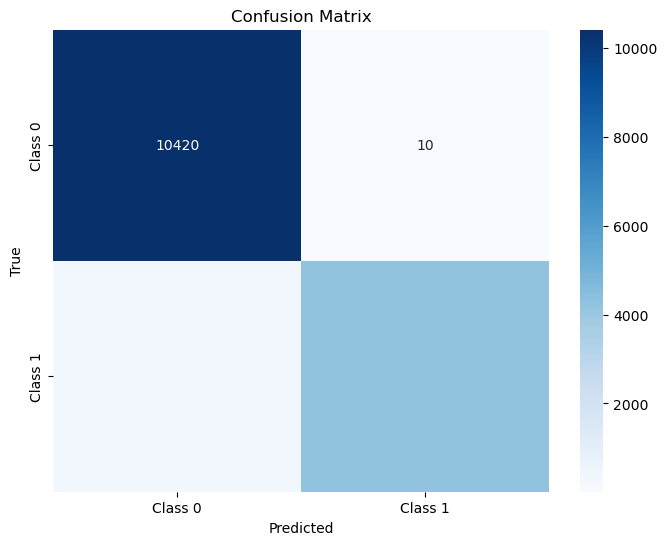

In [122]:
import torch
import torch.nn.functional as F
from torch.nn import BatchNorm1d
from torch_geometric.data import Data, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from torch_geometric.nn import GCNConv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import kneighbors_graph

# Scale features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train1)
#X_test = scaler.transform(X_test1)

#feature = np.array(Features)


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(extracted_features, MENTPSL, test_size=0.15, random_state=1, stratify=MENTPSL, shuffle=True)

# Create edge indices for the training set
adjacency_matrix_train = kneighbors_graph(X_train, n_neighbors=5, mode='connectivity', include_self=False)
edge_index_train = torch.tensor(adjacency_matrix_train.nonzero(), dtype=torch.long)

# Create edge indices for the test set
adjacency_matrix_test = kneighbors_graph(X_test, n_neighbors=5, mode='connectivity', include_self=False)
edge_index_test = torch.tensor(adjacency_matrix_test.nonzero(), dtype=torch.long)

# Convert to PyTorch geometric Data object for training data
x_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.long)
train_data = Data(x=x_train, edge_index=edge_index_train, y=y_train)

# Convert to PyTorch geometric Data object for test data
x_test = torch.tensor(X_test, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.long)
test_data = Data(x=x_test, edge_index=edge_index_test, y=y_test)

# Create DataLoader for train and test datasets
train_loader = DataLoader([train_data], batch_size=64, shuffle=True)
test_loader = DataLoader([test_data], batch_size=64, shuffle=False)

class EnhancedGCN(torch.nn.Module):
    def __init__(self):
        super(EnhancedGCN, self).__init__()
        self.conv1 = GCNConv(train_data.num_features, 64)
        self.bn1 = BatchNorm1d(64)
        self.conv2 = GCNConv(64, 128)
        self.bn2 = BatchNorm1d(128)
        self.conv3 = GCNConv(128, 64)
        self.bn3 = BatchNorm1d(64)
        self.conv4 = GCNConv(64, 32)  # Added another layer for experimentation
        self.bn4 = BatchNorm1d(32)
        self.conv5 = GCNConv(32, 2)  # Assuming binary classification
        self.dropout = torch.nn.Dropout(p=0.5)  # Experiment with different dropout rates

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        
        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        x = self.conv2(x, edge_index)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        x = self.conv3(x, edge_index)
        x = self.bn3(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        x = self.conv4(x, edge_index)
        x = self.bn4(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        x = self.conv5(x, edge_index)
        
        return F.log_softmax(x, dim=1)

# Example training loop with L2 regularization (weight decay)
model = EnhancedGCN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)  # Experiment with different learning rates and weight decay values


# Training function
def train():
    model.train()
    total_loss = 0
    correct = 0
    for batch in DataLoader([train_data], batch_size=1):
        optimizer.zero_grad()
        out = model(batch)
        loss = F.cross_entropy(out, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        pred = out.argmax(dim=1)
        correct += (pred == batch.y).sum().item()
    return total_loss / len(train_loader), correct / len(train_data.y)

# Validation function
def validate():
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for batch in DataLoader([test_data], batch_size=1):
            out = model(batch)
            loss = F.cross_entropy(out, batch.y)
            total_loss += loss.item()
            pred = out.argmax(dim=1)
            correct += (pred == batch.y).sum().item()
    return total_loss / len(val_loader), correct / len(test_data.y)

# Create data loaders
train_loader = DataLoader([train_data], batch_size=1, shuffle=True)
val_loader = DataLoader([test_data], batch_size=1, shuffle=False)

# Lists to store metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training loop
for epoch in range(100):  # Number of epochs
    train_loss, train_acc = train()
    val_loss, val_acc = validate()
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}')


# Evaluation function
def evaluate(loader):
    model.eval()
    all_preds = []
    all_labels = []
    for batch in loader:
        out = model(batch)
        pred = out.argmax(dim=1)
        all_preds.extend(pred.tolist())
        all_labels.extend(batch.y.tolist())
    return all_preds, all_labels

# Get predictions and labels for the test set
y_pred, y_true = evaluate(test_loader)

# Generate classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(extracted_features, MENTPSL, test_size=0.20, random_state=1, stratify=MENTPSL, shuffle=True)

In [63]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
a =  RandomForestClassifier(n_estimators=200, random_state=2,max_depth=150) 
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.9676
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     13906
           1       0.96      0.94      0.95      6094

    accuracy                           0.97     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000

[[13645   261]
 [  387  5707]]
Wall time: 32.3 s


In [64]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, extracted_features, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.72 accuracy with a standard deviation of 0.32


In [65]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
a =  ExtraTreesClassifier(n_estimators=200, random_state=2,max_depth=150) 
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.96565
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     13906
           1       0.95      0.94      0.94      6094

    accuracy                           0.97     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000

[[13603   303]
 [  384  5710]]
Wall time: 13 s


In [66]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, extracted_features, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.71 accuracy with a standard deviation of 0.32


In [67]:
%%time

from sklearn.linear_model import LogisticRegression
a=LogisticRegression( solver='liblinear',multi_class='ovr',C=2.0)
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.97825
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13906
           1       1.00      0.93      0.96      6094

    accuracy                           0.98     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.98      0.98      0.98     20000

[[13897     9]
 [  426  5668]]
Wall time: 521 ms


In [68]:
%%time
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, extracted_features, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.01
Wall time: 3.48 s


In [69]:
%%time
from sklearn.neighbors import KNeighborsClassifier
a = KNeighborsClassifier(n_neighbors=5)
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

0.97775
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13906
           1       1.00      0.93      0.96      6094

    accuracy                           0.98     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.98      0.98      0.98     20000

[[13878    28]
 [  417  5677]]
Wall time: 4.62 s


In [70]:
%%time
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(a, extracted_features, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.72 accuracy with a standard deviation of 0.32
Wall time: 39.6 s


In [71]:
%%time

# Train LightGBM Classifier
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(random_state=2,n_estimators=300)
lg=lgbmc.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = lg.predict(X_test)
print(accuracy_score(y_test,y_pred_class))
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

0.97855
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13906
           1       1.00      0.93      0.96      6094

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000

[[13894    12]
 [  417  5677]]
Wall time: 2.13 s


In [72]:
%%time
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(lgbmc, extracted_features, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.73 accuracy with a standard deviation of 0.30
Wall time: 20.1 s


In [73]:
%%time

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
lg=clf.fit(X_train, y_train)
# 4. make class predictions for X_test_dtm
y_pred_class = lg.predict(X_test)
print(accuracy_score(y_test,y_pred_class))
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test,y_pred_class))

0.978
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13906
           1       1.00      0.93      0.96      6094

    accuracy                           0.98     20000
   macro avg       0.98      0.96      0.97     20000
weighted avg       0.98      0.98      0.98     20000

[[13894    12]
 [  428  5666]]
Wall time: 135 ms


In [74]:
%%time
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(clf, extracted_features, MENTPSL, cv=10)
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.01
Wall time: 622 ms


In [100]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|███████████████████████████████████████████████████████████████████████████████| 29/29 [2:42:03<00:00, 335.28s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.98,0.96,0.96,0.98,3.47
KNeighborsClassifier,0.98,0.96,0.96,0.98,1.34
AdaBoostClassifier,0.98,0.96,0.96,0.98,2.22
RidgeClassifierCV,0.98,0.96,0.96,0.98,0.10
RidgeClassifier,0.98,0.96,0.96,0.98,0.11
NuSVC,0.98,0.96,0.96,0.98,541.08
NearestCentroid,0.98,0.96,0.96,0.98,0.26
LinearDiscriminantAnalysis,0.98,0.96,0.96,0.98,0.17
LinearSVC,0.98,0.96,0.96,0.98,0.55


In [50]:
extracted_features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 3.0671759 , 0.        , ..., 2.198818  , 6.929346  ,
        6.4938807 ],
       [0.        , 1.0391525 , 0.        , ..., 3.355166  , 6.7442727 ,
        6.867384  ],
       [0.        , 1.5394393 , 0.        , ..., 0.81167215, 6.1183195 ,
        5.3498697 ]], dtype=float32)

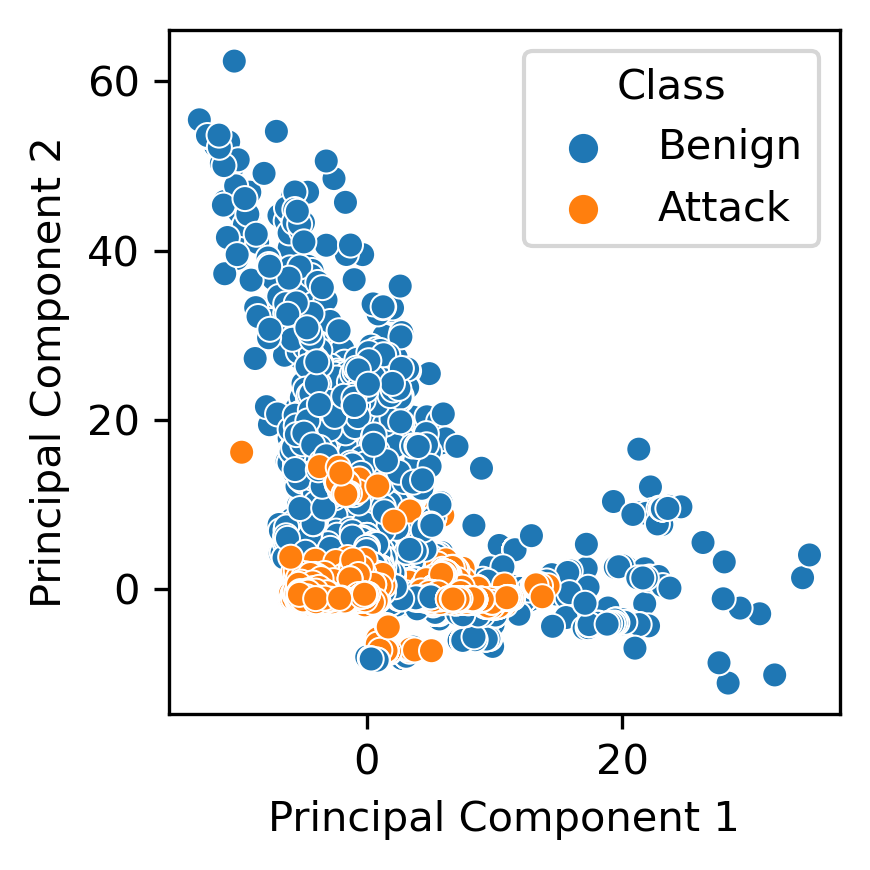

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X' is your DataFrame containing all the features
# Assuming 'y' is a Series containing the class labels

# Instantiate PCA with the desired number of components
pca = PCA(n_components=2)

# Fit PCA to your data and transform it to the lower-dimensional space
X_pca = pca.fit_transform(MENFPSL)

# Create DataFrame combining the principal components and class labels
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Class'] = MENTPSL

# Create scatter plot of the first two principal components
plt.figure(figsize=(3, 3),dpi=300)
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_pca, palette='tab10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', loc='upper right')
plt.tight_layout()
plt.show()


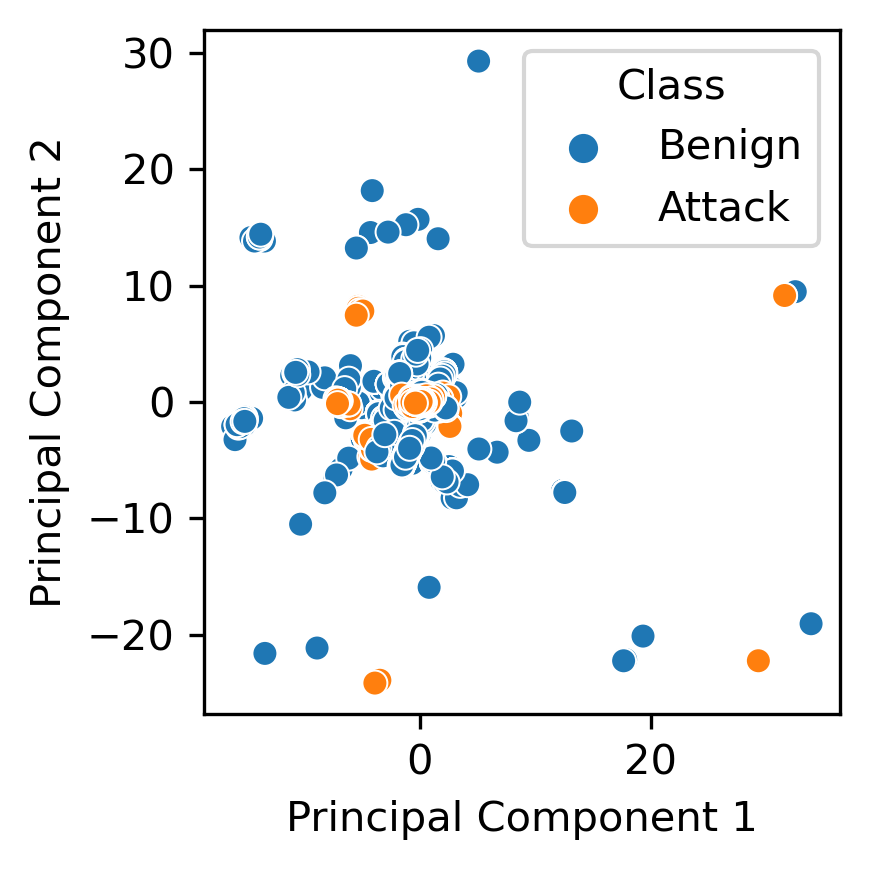

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X' is your DataFrame containing all the features
# Assuming 'y' is a Series containing the class labels

# Instantiate PCA with the desired number of components
pca = PCA(n_components=2)

# Fit PCA to your data and transform it to the lower-dimensional space
X_pca = pca.fit_transform(MENFCCA)

# Create DataFrame combining the principal components and class labels
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Class'] = MENTCCA

# Create scatter plot of the first two principal components
plt.figure(figsize=(3, 3),dpi=300)
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_pca, palette='tab10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', loc='upper right')
plt.tight_layout()
plt.show()


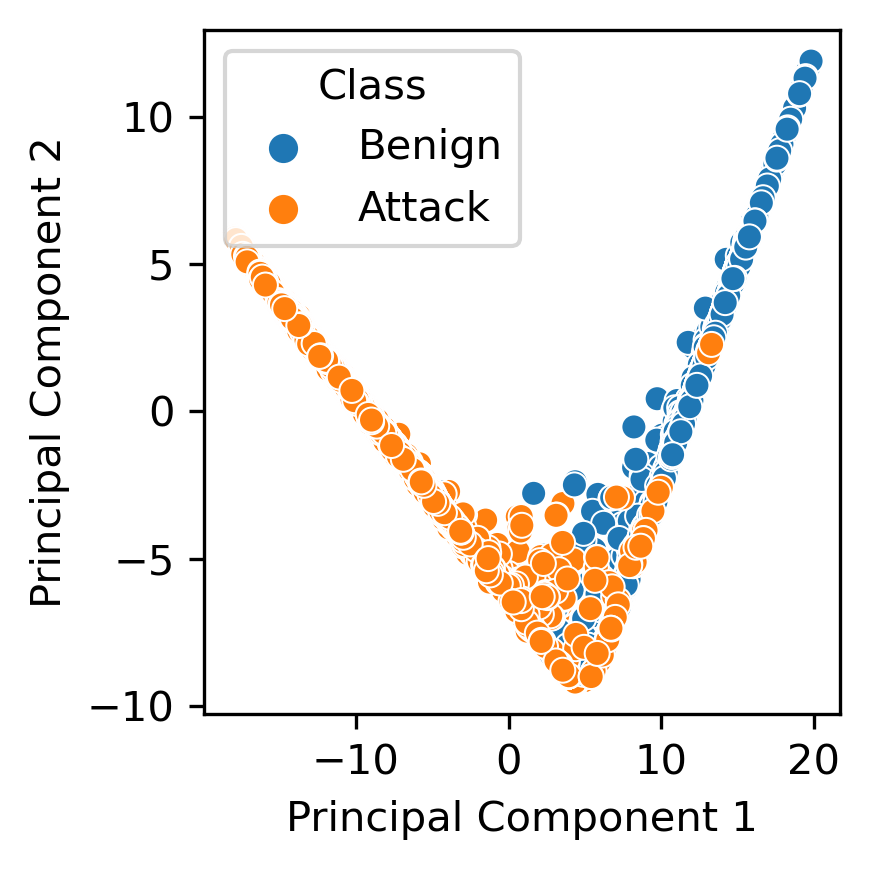

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'X' is your DataFrame containing all the features
# Assuming 'y' is a Series containing the class labels

# Instantiate PCA with the desired number of components
pca = PCA(n_components=2)

# Fit PCA to your data and transform it to the lower-dimensional space
X_pca = pca.fit_transform(extracted_features)

# Create DataFrame combining the principal components and class labels
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
MENTPSL = pd.concat([DataITarget['Target'][:50000], DataFTarget['Target'][:50000]], ignore_index=True)

df_pca['Class'] = MENTPSL

# Create scatter plot of the first two principal components
plt.figure(figsize=(3, 3),dpi=300)
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_pca, palette='tab10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', loc='upper left')
plt.tight_layout()
plt.show()


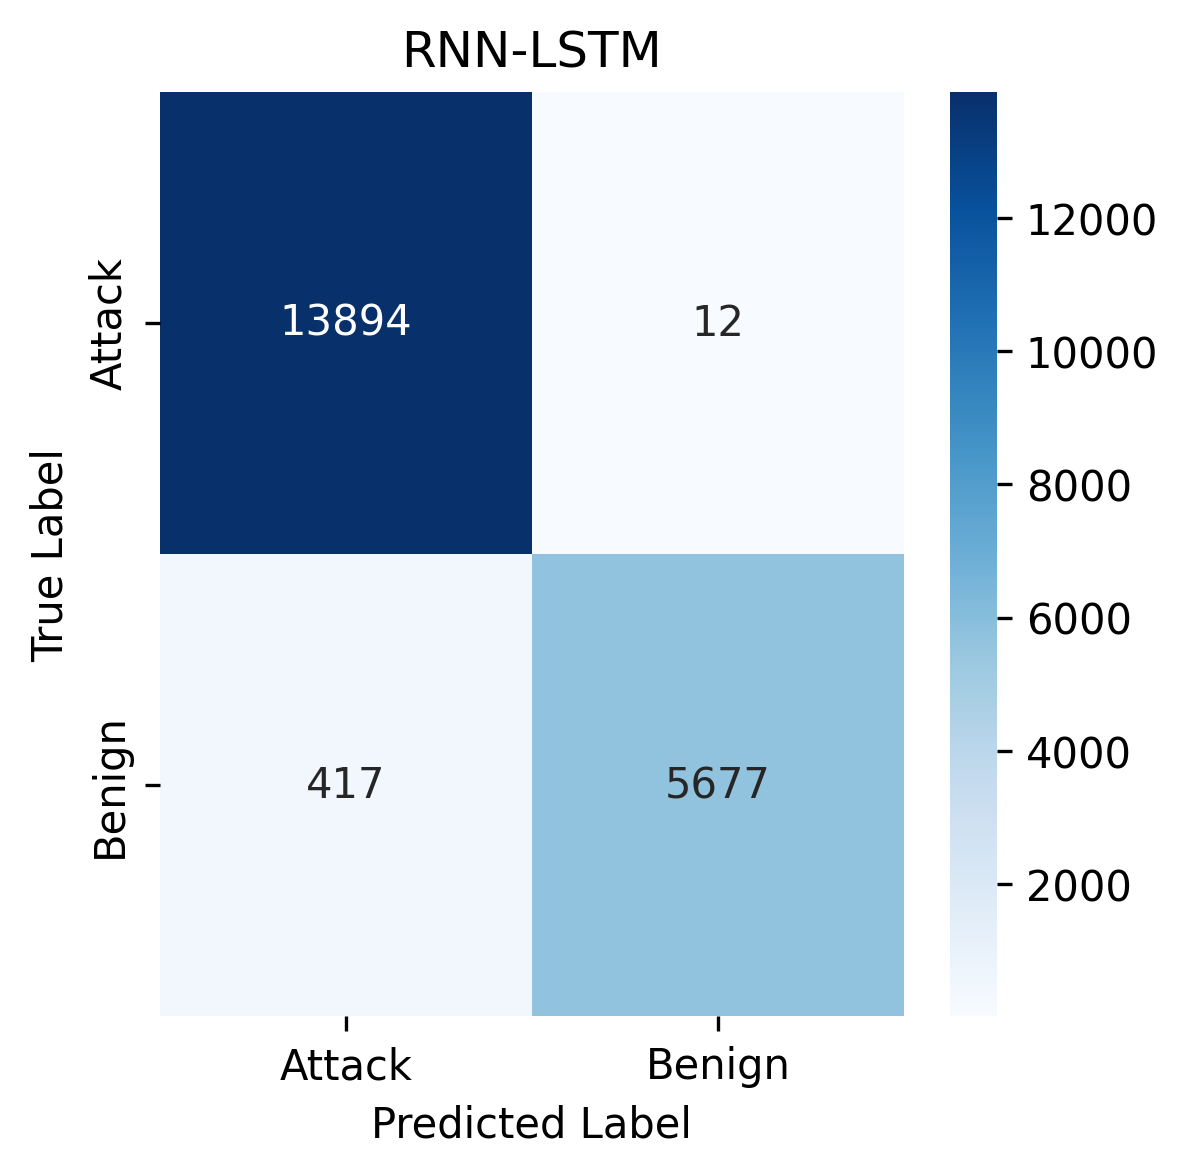

In [75]:


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix data
conf_matrix = np.array([[13894,    12],
 [  417,  5677]])

# Define class labels
class_labels = [ "Attack","Benign"]

# Plot confusion matrix
plt.figure(figsize=(4, 4),dpi=300)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('RNN-LSTM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores for CCA
cca_accuracy = [0.969, 0.939, 0.977, 0.977, 0.729]

# Accuracy scores for PSL
psl_accuracy = [0.973, 0.950, 0.977, 0.978, 0.761]

# Models
models = ['RF', 'LR', 'KNN', 'LGBM', 'GNB']

# Plotting
plt.plot(models, cca_accuracy, marker='o', label='CCA')
plt.plot(models, psl_accuracy, marker='o', label='PSL')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Models for CCA and PSL')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['GNB', 'LGBM', 'KNN', 'LR', 'RF']

# Accuracy scores and standard deviations for RNN-LSTM
rnn_lstm_accuracy = [0.98, 0.87, 0.82, 0.98, 0.83]
rnn_lstm_std = [0.01, 0.18, 0.22, 0.01, 0.22]

# Accuracy scores and standard deviations for CCA
cca_accuracy = [0.74, 0.71, 0.71, 0.89, 0.69]
cca_std = [0.08, 0.33, 0.33, 0.08, 0.33]

# Accuracy scores and standard deviations for PSL
psl_accuracy = [0.74, 0.70, 0.70, 0.94, 0.69]
psl_std = [0.14, 0.34, 0.34, 0.04, 0.33]

# Plotting
bar_width = 0.25
index = range(len(models))

plt.figure(figsize=(7, 4),dpi=300)
plt.bar(index, rnn_lstm_accuracy, bar_width, yerr=rnn_lstm_std, label='RNN-LSTM', capsize=5)
plt.bar([i + bar_width for i in index], cca_accuracy, bar_width, yerr=cca_std, label='CCA', capsize=5)
plt.bar([i + 2 * bar_width for i in index], psl_accuracy, bar_width, yerr=psl_std, label='PSL', capsize=5)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks([i + bar_width for i in index], models)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


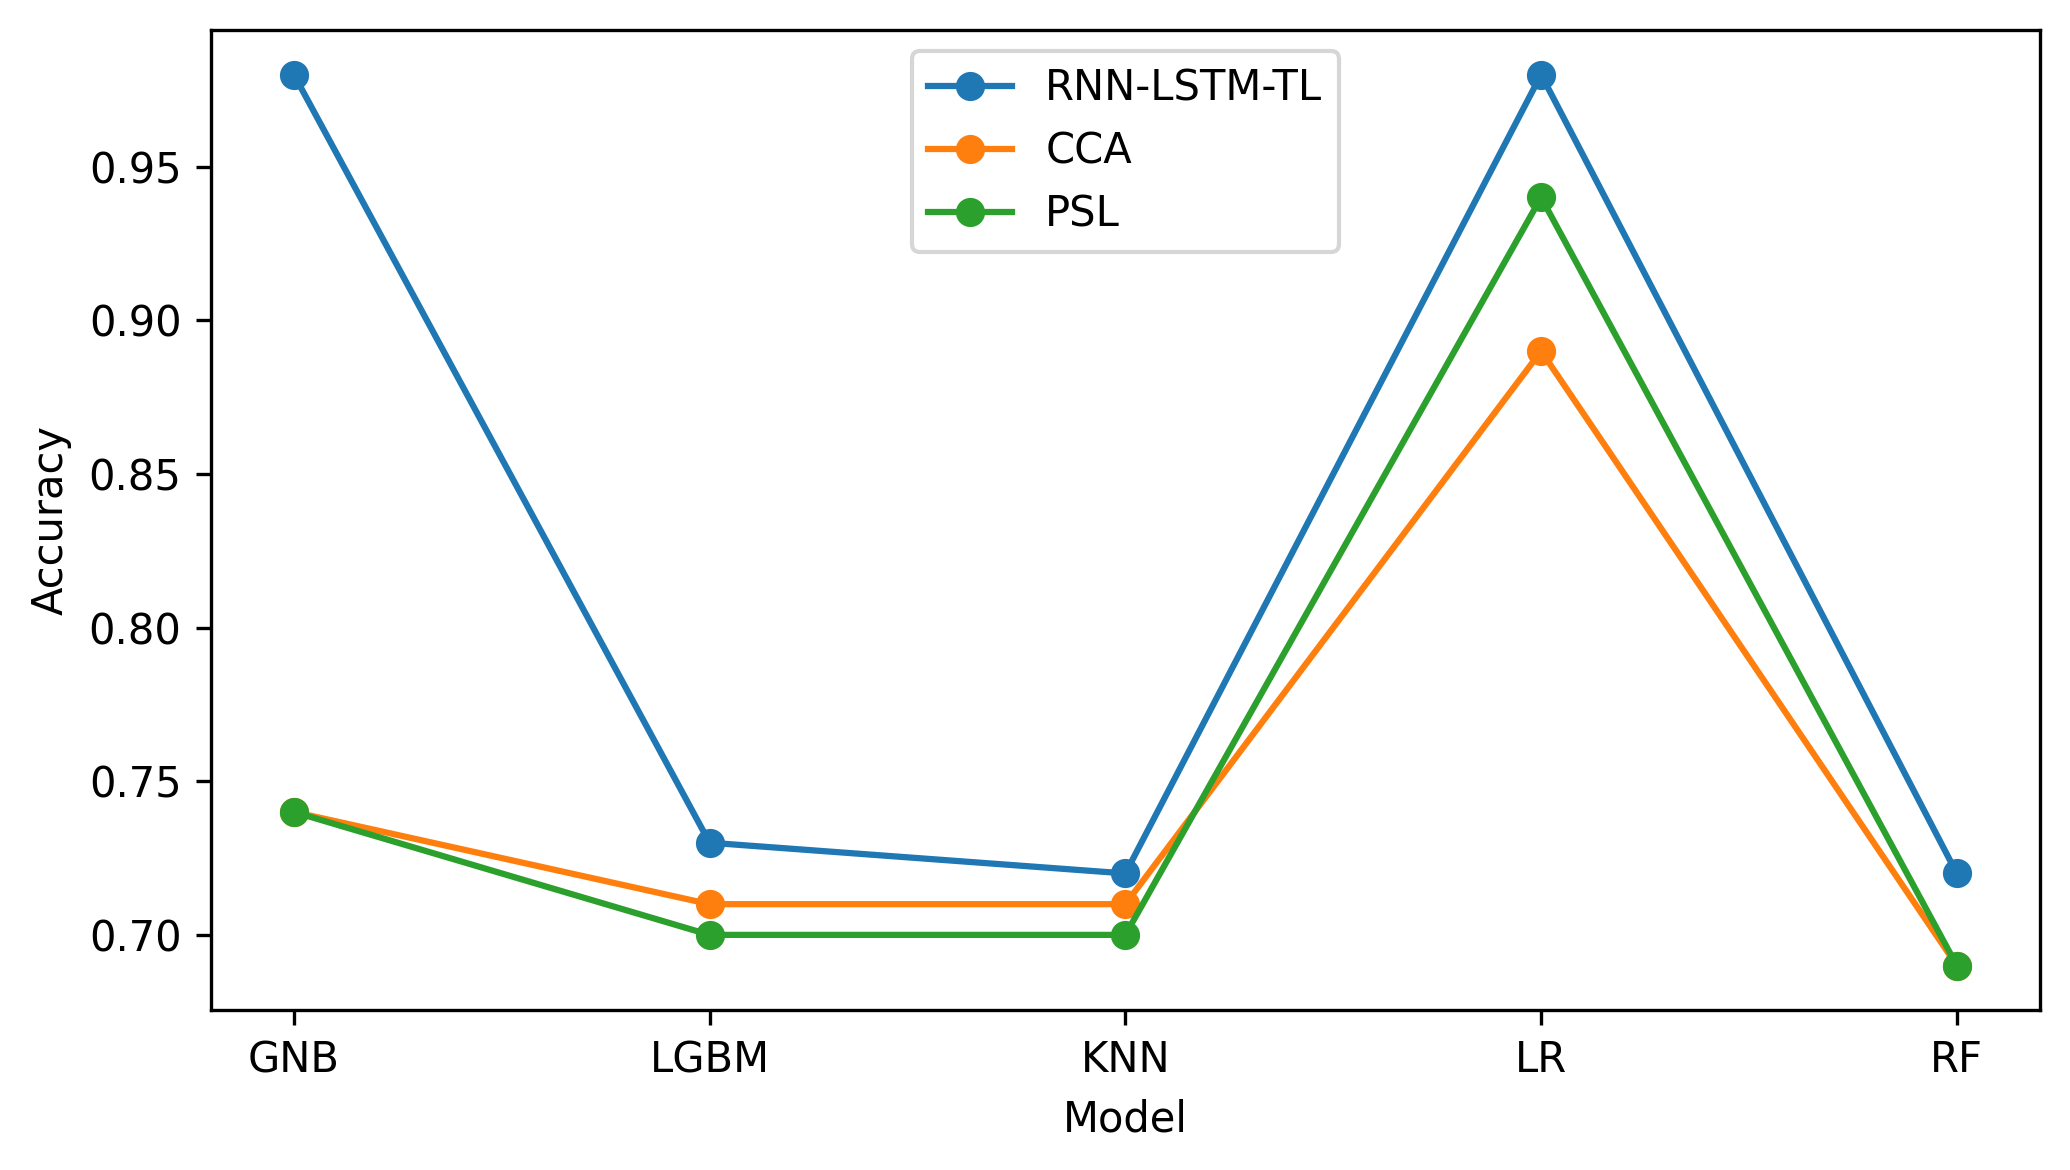

In [77]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
model_accuracy = {
    'RNN-LSTM-TL': {'GNB': 0.98, 'LGBM': 0.73, 'KNN': 0.72, 'LR': 0.98, 'RF': 0.72},
    'CCA': {'GNB': 0.74, 'LGBM': 0.71, 'KNN': 0.71, 'LR': 0.89, 'RF': 0.69},
    'PSL': {'GNB': 0.74, 'LGBM': 0.70, 'KNN': 0.70, 'LR': 0.94, 'RF': 0.69}
}
plt.figure(figsize=(7, 4),dpi=300)
# Plotting
for model_type, model_scores in model_accuracy.items():
    plt.plot(list(model_scores.keys()), list(model_scores.values()), marker='o', label=model_type)

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend()

# Show plot

plt.tight_layout()
plt.show()


C:\Users\knowl\AppData\Local\Temp\ipykernel_25836\3216806570.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(df_scenario_5["Model"], rotation=45, ha='right')
C:\Users\knowl\AppData\Local\Temp\ipykernel_25836\3216806570.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(df_scenario_5["Model"], rotation=45, ha='right')
C:\Users\knowl\AppData\Local\Temp\ipykernel_25836\3216806570.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(df_scenario_5["Model"], rotation=45, ha='right')
C:\Users\knowl\AppData\Local\Temp\ipykernel_25836\3216806570.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a

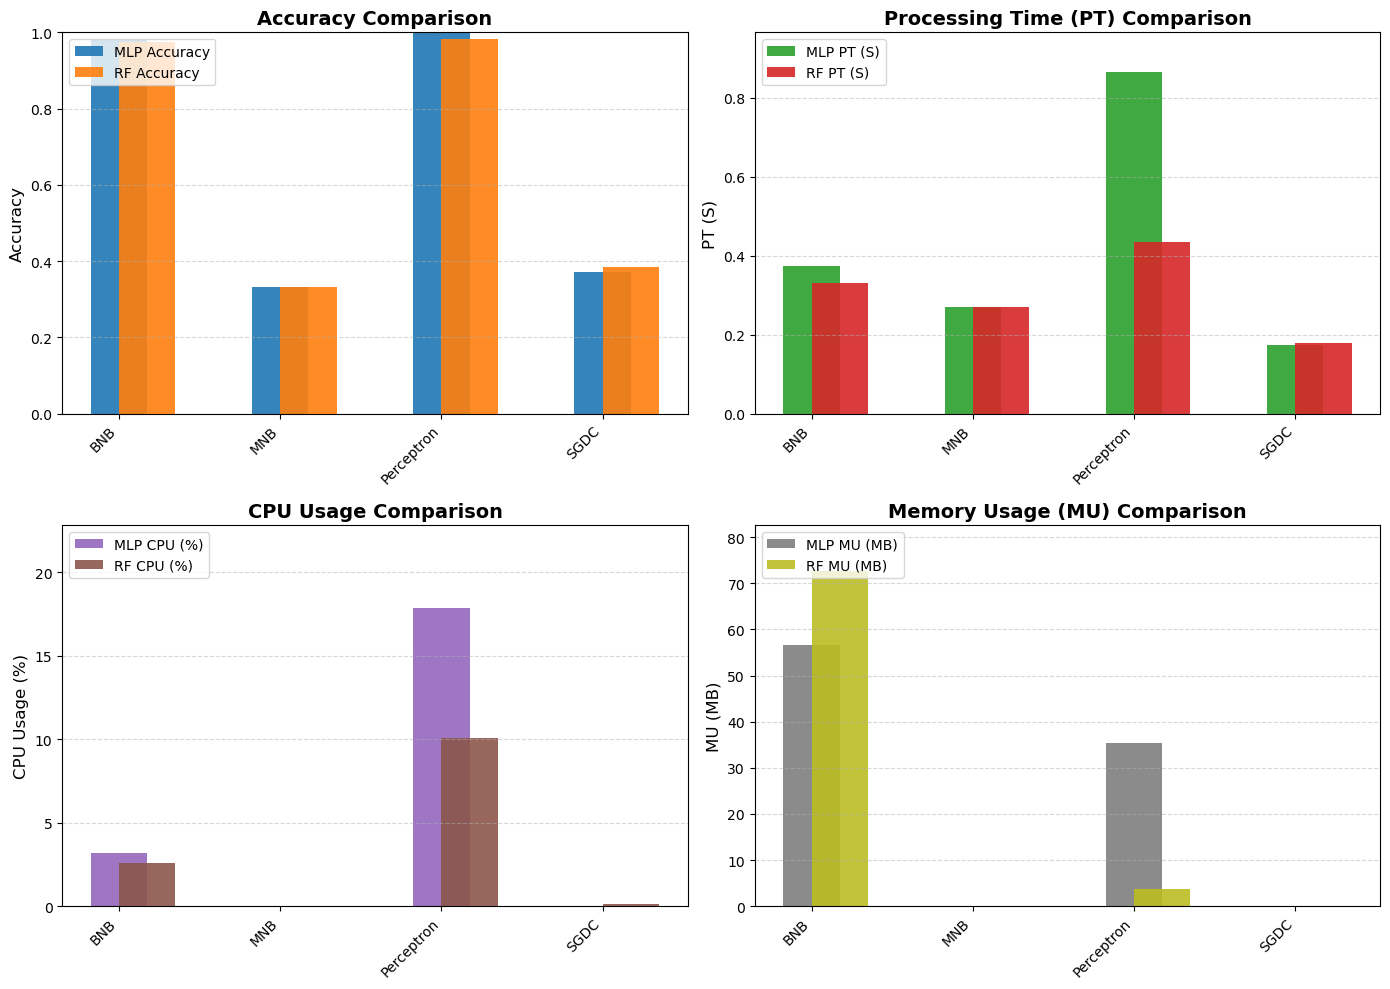

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for Scenario 5 (M1 and M2 under Multi-LF with Human Involvement)
models = ["BNB", "MNB", "Perceptron", "SGDC"]
mlp_accuracy = [0.979, 0.331, 0.999, 0.371]
mlp_pt = [0.374, 0.270, 0.866, 0.174]
mlp_cpu = [3.158, 0.022, 17.84, 0.035]
mlp_mu = [56.53, 0.009, 35.48, 0.018]

rf_accuracy = [0.975, 0.331, 0.983, 0.384]
rf_pt = [0.331, 0.270, 0.434, 0.178]
rf_cpu = [2.564, 0.019, 10.05, 0.102]
rf_mu = [72.69, 0.020, 3.632, 0.020]

# Create a dataframe
df_scenario_5 = pd.DataFrame({
    "Model": models,
    "MLP Accuracy": mlp_accuracy,
    "MLP PT (S)": mlp_pt,
    "MLP CPU (%)": mlp_cpu,
    "MLP MU (MB)": mlp_mu,
    "RF Accuracy": rf_accuracy,
    "RF PT (S)": rf_pt,
    "RF CPU (%)": rf_cpu,
    "RF MU (MB)": rf_mu
})

# Plotting the data for Scenario 5
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Accuracy Comparison with dynamically adjusted y-axis
axs[0, 0].bar(df_scenario_5["Model"], df_scenario_5["MLP Accuracy"], label="MLP Accuracy", alpha=0.9, color='#1f77b4', width=0.35, align='center')
axs[0, 0].bar(df_scenario_5["Model"], df_scenario_5["RF Accuracy"], label="RF Accuracy", alpha=0.9, color='#ff7f0e', width=0.35, align='edge')
axs[0, 0].set_title("Accuracy Comparison", fontsize=14, fontweight='bold')
axs[0, 0].set_ylabel("Accuracy", fontsize=12)
axs[0, 0].legend(loc='upper left', fontsize=10)
axs[0, 0].set_xticklabels(df_scenario_5["Model"], rotation=45, ha='right')
axs[0, 0].grid(True, axis='y', linestyle='--', alpha=0.5)
axs[0, 0].set_ylim(0, 1)

# 2. Processing Time (PT) Comparison with dynamically adjusted y-axis
axs[0, 1].bar(df_scenario_5["Model"], df_scenario_5["MLP PT (S)"], label="MLP PT (S)", alpha=0.9, color='#2ca02c', width=0.35, align='center')
axs[0, 1].bar(df_scenario_5["Model"], df_scenario_5["RF PT (S)"], label="RF PT (S)", alpha=0.9, color='#d62728', width=0.35, align='edge')
axs[0, 1].set_title("Processing Time (PT) Comparison", fontsize=14, fontweight='bold')
axs[0, 1].set_ylabel("PT (S)", fontsize=12)
axs[0, 1].legend(loc='upper left', fontsize=10)
axs[0, 1].set_xticklabels(df_scenario_5["Model"], rotation=45, ha='right')
axs[0, 1].grid(True, axis='y', linestyle='--', alpha=0.5)
axs[0, 1].set_ylim(0, max(df_scenario_5["MLP PT (S)"].max(), df_scenario_5["RF PT (S)"].max()) + 0.1)

# 3. CPU Usage Comparison with dynamically adjusted y-axis
axs[1, 0].bar(df_scenario_5["Model"], df_scenario_5["MLP CPU (%)"], label="MLP CPU (%)", alpha=0.9, color='#9467bd', width=0.35, align='center')
axs[1, 0].bar(df_scenario_5["Model"], df_scenario_5["RF CPU (%)"], label="RF CPU (%)", alpha=0.9, color='#8c564b', width=0.35, align='edge')
axs[1, 0].set_title("CPU Usage Comparison", fontsize=14, fontweight='bold')
axs[1, 0].set_ylabel("CPU Usage (%)", fontsize=12)
axs[1, 0].legend(loc='upper left', fontsize=10)
axs[1, 0].set_xticklabels(df_scenario_5["Model"], rotation=45, ha='right')
axs[1, 0].grid(True, axis='y', linestyle='--', alpha=0.5)
axs[1, 0].set_ylim(0, max(df_scenario_5["MLP CPU (%)"].max(), df_scenario_5["RF CPU (%)"].max()) + 5)

# 4. Memory Usage (MU) Comparison with dynamically adjusted y-axis
axs[1, 1].bar(df_scenario_5["Model"], df_scenario_5["MLP MU (MB)"], label="MLP MU (MB)", alpha=0.9, color='#7f7f7f', width=0.35, align='center')
axs[1, 1].bar(df_scenario_5["Model"], df_scenario_5["RF MU (MB)"], label="RF MU (MB)", alpha=0.9, color='#bcbd22', width=0.35, align='edge')
axs[1, 1].set_title("Memory Usage (MU) Comparison", fontsize=14, fontweight='bold')
axs[1, 1].set_ylabel("MU (MB)", fontsize=12)
axs[1, 1].legend(loc='upper left', fontsize=10)
axs[1, 1].set_xticklabels(df_scenario_5["Model"], rotation=45, ha='right')
axs[1, 1].grid(True, axis='y', linestyle='--', alpha=0.5)
axs[1, 1].set_ylim(0, max(df_scenario_5["MLP MU (MB)"].max(), df_scenario_5["RF MU (MB)"].max()) + 10)

# Display the improved and dynamically adjusted graphs
plt.tight_layout()
plt.show()
